## Mall Customers Segmentation 🛍️
by : Abizard

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [83]:
print(df.info())
print('SHAPE:',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
SHAPE: (200, 5)


**Dataset Characteristic**
- CustomerID : Unique ID assigned to the customer
- Gender : Gender of the customer
- Age : Age of the customer
- Annual Income (k$) : Annual Income of the customer
- Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature (The total score represents the level of customer tendency to shop)

In [84]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values ​​in this data

In [85]:
df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Tendency Score'}, inplace=True)

In [86]:
df.head()

,CustomerID,Gender,Age,Income,Tendency Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Exploratory Data Analysis (EDA)**

In [87]:
df.describe()

,CustomerID,Age,Income,Tendency Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


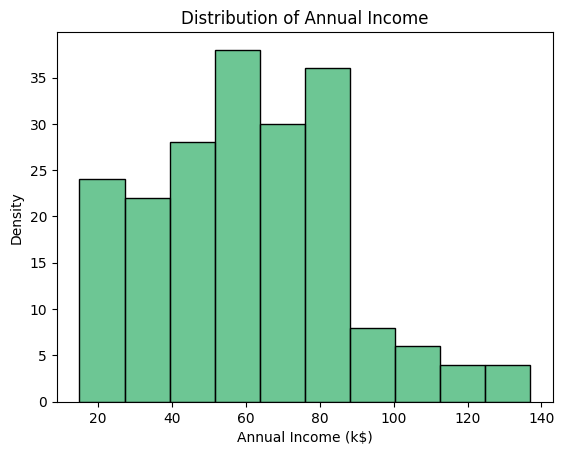

In [88]:
sns.histplot(df['Income'], bins=10, kde=False, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

**Information #1:**<br>
Most customers have an annual income of **60 thousand dollars ($60k)**

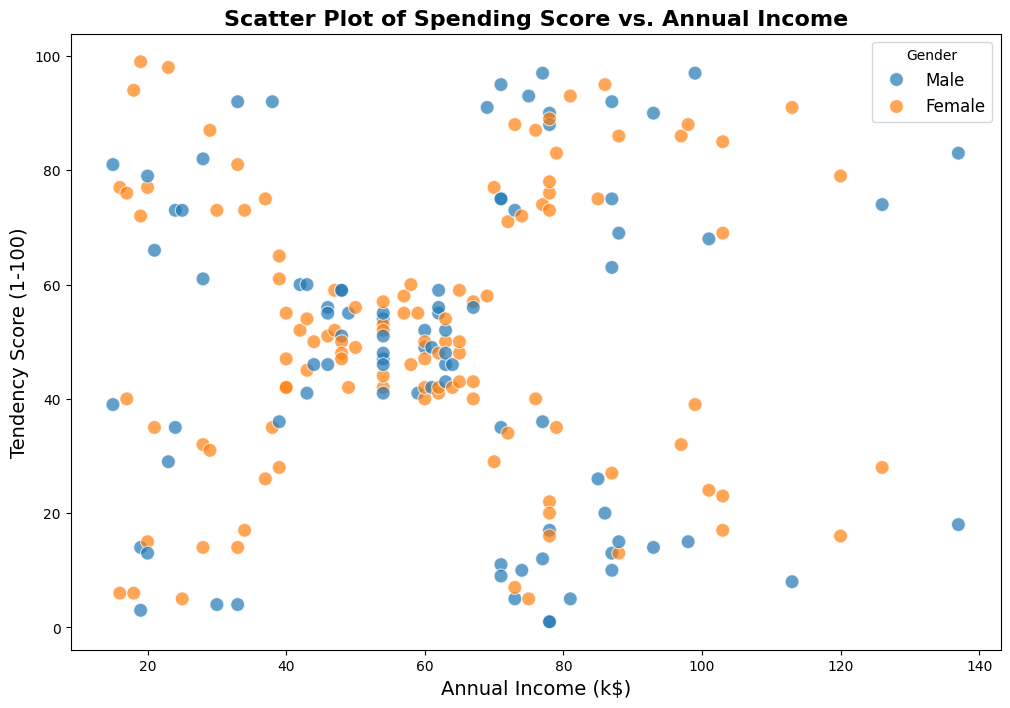

In [89]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Income',
    y='Tendency Score',
    hue='Gender',
    data=df,
    s=100,
    alpha=0.7,
    edgecolor='w'
)

plt.title('Scatter Plot of Spending Score vs. Annual Income', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Tendency Score (1-100)', fontsize=14)
plt.legend(title='Gender', loc='best', fontsize=12)
plt.show()

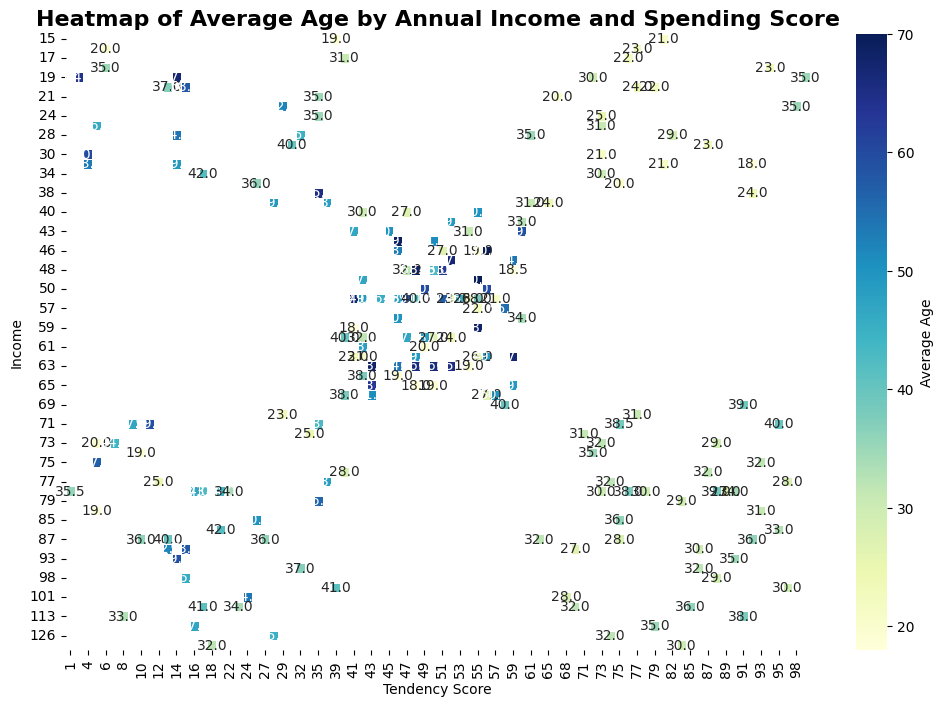

In [95]:
heatmap_df = df.pivot_table(
    index='Income',
    columns='Tendency Score',
    values='Age',
    aggfunc='mean'
)

plt.figure(figsize=(12,8))
sns.heatmap(
    heatmap_df,
    cmap='YlGnBu',
    annot=True,
    fmt='.1f',
    linewidths=.5,
    cbar_kws={'label': 'Average Age'}
)

plt.title('Heatmap of Average Age by Annual Income and Spending Score', fontsize=16, fontweight='bold')
plt.show()

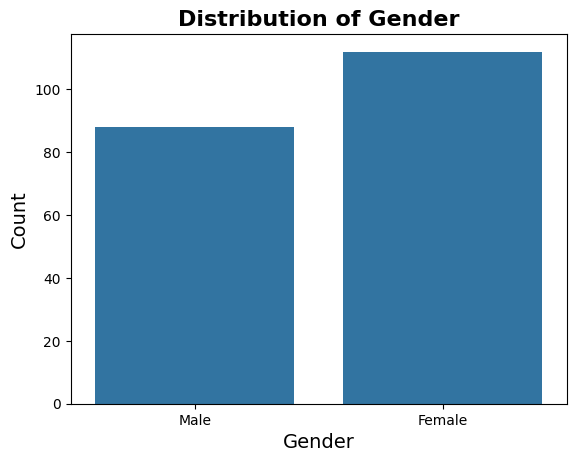

In [90]:
sns.countplot(
    x='Gender',
    data=df
)
plt.title('Distribution of Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**Information #2:**<br>
Based on the visualization above, it is observed that the number of customers with female gender is higher compared to males. Additionally, it can be seen that the majority of females tend to have a higher spending score (mostly >40) across various annual income levels. This information aligns with the psychological tendencies in shopping, where a majority of women are generally more inclined towards shopping. Furthermore, it is observed that individuals within the age range of >20 to <=40 tend to have the highest spending tendencies, even though their annual income levels vary and do not always show a linear relationship with their spending behavior🛍️

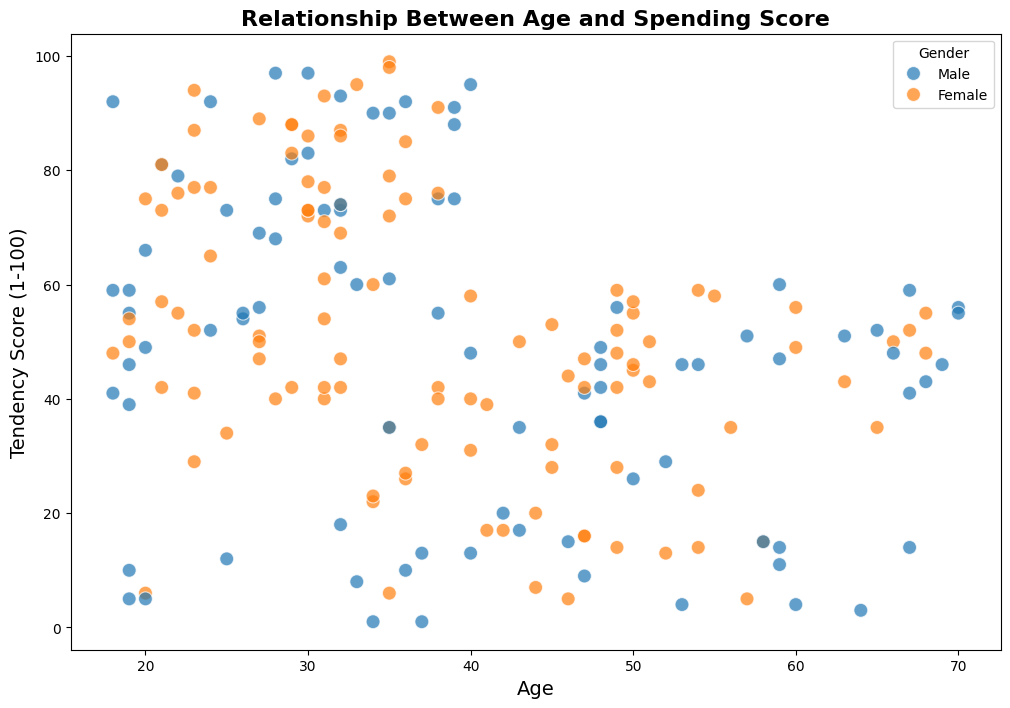

In [91]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Age',
    y='Tendency Score',
    hue='Gender',
    data=df,
    s=100,
    alpha=0.7,
    edgecolor='w'
)

plt.title('Relationship Between Age and Spending Score', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Tendency Score (1-100)', fontsize=14)
plt.show()

In [92]:
correlation = df[['Age', 'Tendency Score']].corr().iloc[0, 1]
print(f'Pearson correlation coefficient between Age and Spending Score: {correlation:.2f}')

Pearson correlation coefficient between Age and Spending Score: -0.33


**Information #3:**<br>
Based on the insights obtained from the visualization and the Pearson correlation coefficient of -0.33 (indicating a negative correlation), it can be observed that as the age of customers increases, their tendency to spend decreases👴

<Figure size 1200x800 with 0 Axes>

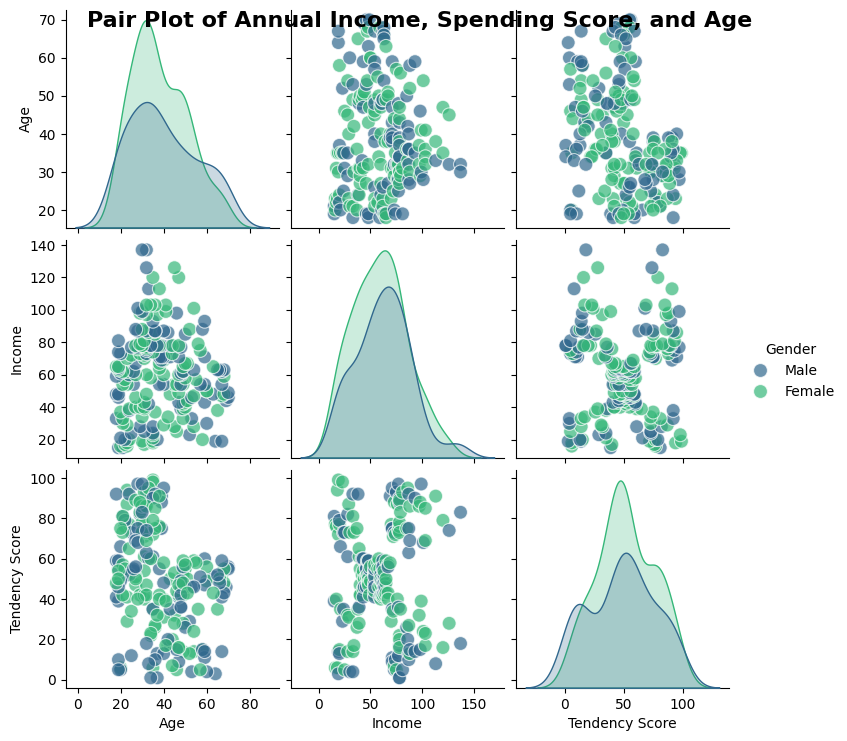

In [56]:
plt.figure(figsize=(12, 8))
sns.pairplot(
    df,
    vars=df.columns[2:5],
    hue='Gender',
    palette='viridis',
    plot_kws={'alpha':0.7, 's':100, 'edgecolor':'w'}
)

plt.suptitle('Pair Plot of Annual Income, Spending Score, and Age', fontsize=16, fontweight='bold')
plt.show()

**ML Implementation (K-Means)**

In [98]:
from sklearn.cluster import KMeans

In [96]:
X = df.iloc[:, [3,4]].values

In [97]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Using Elbow Method to Find the Best Number of Clusters**

c:\Users\abiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

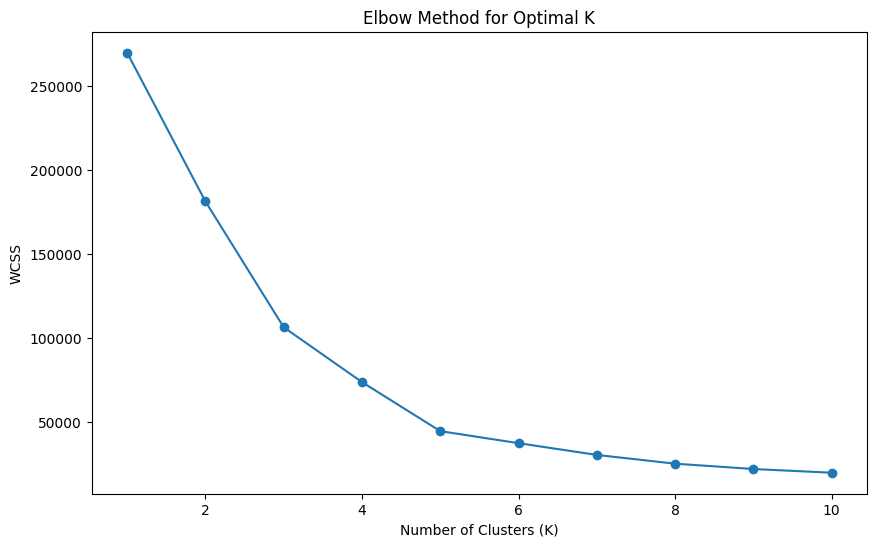

In [99]:
k_values = range(1,11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

Best Number of Cluster = **5**

In [100]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
pred = kmeans.fit_predict(X)

c:\Users\abiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [101]:
print(pred)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [103]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i} : {centroid}")

Cluster 0 : [55.2962963  49.51851852]
Cluster 1 : [86.53846154 82.12820513]
Cluster 2 : [88.2        17.11428571]
Cluster 3 : [26.30434783 20.91304348]
Cluster 4 : [25.72727273 79.36363636]


In [104]:
df['Prediction'] = pred
df.head()

,CustomerID,Gender,Age,Income,Tendency Score,Prediction
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


**Define thresholds and labels**

In [119]:
cluster_names = {}
for i, centroid in enumerate(centroids):
    income = centroid[0]
    tend_score = centroid[1]

    if income < 60:
        income_label = "Low Income"
    elif 60 <= income <= 90:
        income_label = "Medium Income"
    else:
        income_label = "High Income"

    if tend_score < 60:
        score_label = "Low Tendency"
    elif 60 <= tend_score <= 80:
        score_label = "Medium Tendency"
    else:
        score_label = "High Tendency"

    cluster_names[i] = f"{income_label}, {score_label}"

In [120]:
cluster_names

{0: 'Low Income, Low Tendency',
 1: 'Medium Income, High Tendency',
 2: 'Medium Income, Low Tendency',
 3: 'Low Income, Low Tendency',
 4: 'Low Income, Medium Tendency'}

In [121]:
df['Cluster'] = df['Prediction'].map(cluster_names)
df.head()

,CustomerID,Gender,Age,Income,Tendency Score,Prediction,Cluster
0,1,Male,19,15,39,3,"Low Income, Low Tendency"
1,2,Male,21,15,81,4,"Low Income, Medium Tendency"
2,3,Female,20,16,6,3,"Low Income, Low Tendency"
3,4,Female,23,16,77,4,"Low Income, Medium Tendency"
4,5,Female,31,17,40,3,"Low Income, Low Tendency"


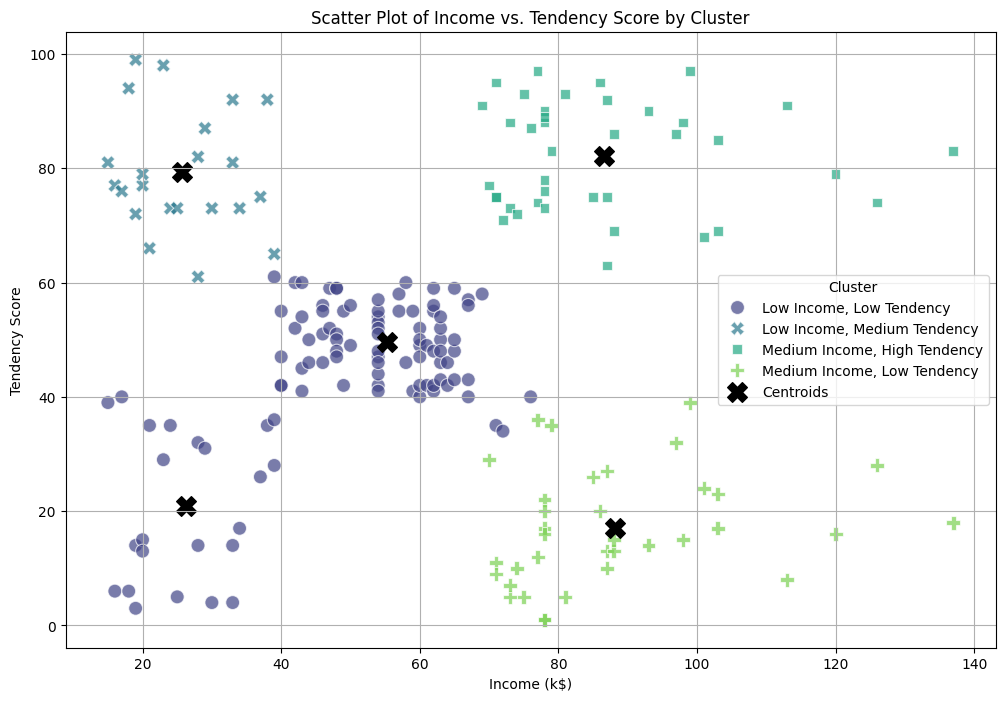

In [122]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Income',
    y='Tendency Score',
    hue='Cluster',
    style='Cluster',
    palette='viridis',
    data=df,
    s=100,
    alpha=0.7,
    edgecolor='w'
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='black',
    marker='X',
    s=200,
    label='Centroids',
    edgecolor='k'
)

plt.title('Scatter Plot of Income vs. Tendency Score by Cluster')
plt.xlabel('Income (k$)')
plt.ylabel('Tendency Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()